# WeRateDogs Twitter Project: Wrangling and Analyze Data
*By Carla Mota Leal*

### Importing the necessary packages:

In [1]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import numpy as np
import requests
import json
from timeit import default_timer as timer

## Data Gathering
In the cell below, I will gather **all** three pieces of data for this project and load them in this notebook. 
**Note:** the methods required to gather each data are different.
1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#First, I downloaded the Twitter archive from Udacity and will read it into a dataframe.
twit_arc_raw = pd.read_csv('twitter-archive-enhanced.csv')

2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

> 'image_predictions.tsv' is hosted on Udacity's server and will be downloaded programmatically using the Requests library. I will use this URL :'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [3]:
# Image predictions URL provided by Udacity
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [4]:
predict_raw = pd.read_csv('image-predictions.tsv', sep='\t')

3. Using the Tweepy library to **query** additional data via the Twitter API (tweet_json.txt)

> The Twitter archive provided by Udacity does not have all of the desired data, specifically retweet and favorite counts. I will use the Twitter API to read each tweet's JSON data into its own line in a TXT file. Then I will read this file line by line to create a dataframe with retweet and favorite counts. Some of the tweets provided by Udacity may have been deleted, so I will also keep track of this. Note that the consumer_key, consumer_secret, access_token, and access_secret have been deleted here.

In [5]:
## Install Tweepy if haven't already:
#!pip install tweepy

In [5]:
# Setting up Twitter API credentials:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twit_arc_raw.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [6]:
twit_json_raw = pd.read_json('tweet-json.txt', lines=True)

In [7]:
# Copies for cleaning
twit_arc = twit_arc_raw.copy()
predict = predict_raw.copy()
twit_json = twit_json_raw.copy()

> Now I have a DataFrame *api_df* containing the tweet ID, retweet count, and favorite count for each tweet.
> Note that I'll need to replace the placeholders with actual Twitter API credentials.

## Assessing Data
In this section, I will detect and document **eight (9) quality issues and two (3) tidiness issue**. And I will use **both** visual assessment
programmatic assessement to assess the data.

**Note:** 

* I only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate my skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* I do not need to gather the tweets beyond August 1st, 2017. I can, but note that I won't be able to gather the image predictions for these tweets since I don't have access to the algorithm used.



In [8]:
# Now that the data is gathered, I will assess it. 
# First I will perform a visual assessment:

twit_arc 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
twit_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
predict 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
twit_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [16]:
twit_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [9]:
# checking for duplicates 

twit_arc.duplicated().sum()

0

In [10]:
predict.duplicated().sum()

0

In [11]:
twit_json.id.duplicated().sum()

0

In [12]:
# checking for datatype 01 & missing values

twit_arc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [44]:
# checking for wrong names

pd.set_option('display.max_rows', 30)
twit_arc.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Daisy          7
Toby           7
            ... 
Walker         1
Crumpet        1
Harnold        1
Kaia           1
Tiger          1
Sojourner      1
Tedders        1
Bubba          1
Wesley         1
Griswold       1
Flash          1
Aqua           1
Orion          1
Pete           1
Ben            1
Name: name, Length: 957, dtype: int64

In [13]:
twit_arc.query("name in ['a', 'an', 'the', 'not', 'actually']").name.value_counts()
# there were many names which were clearly wring names ( a, the, an, not ....) 
# I will change those names into "None" 

a           55
the          8
an           7
not          2
actually     2
Name: name, dtype: int64

In [14]:
# First, converting the rating_numerator and rating_denominator columns to integers using the astype() method:
twit_arc_check = twit_arc['rating_numerator'].astype(int)
twit_arc_check = twit_arc['rating_denominator'].astype(int)

In [15]:
# checking for the wrong ratings

twit_arc_check = twit_arc.query('rating_denominator != 10')
twit_arc_check = twit_arc_check[['text','rating_numerator', 'rating_denominator']]
twit_arc_check.head()

# Some rows have wrong rating denominator & rating numerator.
# They must be amended manually, based on what's written on "text" column.

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11


In [16]:
# checking for datatypes 02

predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
# checking for datatypes 03

twit_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

### Quality issues

*twit_arc* 
1. Remove duplicated data in "expanded_urls" column & the rows with null value in the same column
2. Remove rows that have values in "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp" columns
3. Change the datatype of "timestamp" column to datatime
4. Get the right ratings in "rating nominator" & "rating denominator", and merge into one column
5. Change the datatype of "tweed_id" columnb to str
6. Remove words that are not names in 'name' column

*twit_json*

7. Change the datatype of "tweed_id" columnb to str

*predict*

8. "P1", "P2", "P3" columns should start with upper case letter
9. Change the datatype of "tweed_id" columnb to str

### Tidiness issues
*twit_arc*
1. Dog stage (doggo, floofer, pupper, puppo) must be merged into one column.

*twit_json*
2. Add the retweet_count and favorite_count columns to the twit_arc, since this data is meant to augment the archived tweet data.

*predict*
3. Add breed prediction column to twit_arc as it could give more information on which breed of dog has been posted most.

## Cleaning Data
In this section, I will clean **all** of the issues I have documented while assessing. 

**Note:** I have done a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### Issue #1: *twit_arc* Remove duplicated data in "expanded_urls" column & the rows with null value in the same column


#### Define: 
1. Remove null values in expanded_urls with .dropna functions
2. Split the value with .split function, and choose the first value

#### Code

In [8]:
# 1. Removing null values in expanded_urls with .dropna functions

twit_arc.dropna(subset = ['expanded_urls'], inplace = True)

# 2. Splitting the value with .split function, and choose the first value
def delete_duplicated_urls(url):
    true_url = url.split(',')[0]
    return true_url

twit_arc['correct_expanded_urls'] = twit_arc.apply(lambda x: delete_duplicated_urls(x['expanded_urls']), axis=1)
twit_arc.drop('expanded_urls', axis=1, inplace=True)

#The apply() function is then used to apply the delete_duplicated_urls() function to each row in the twit_arc DataFrame, using the axis=1 parameter to apply the function row-wise. The resulting URLs are stored in a new column called correct_expanded_urls.
#the original expanded_urls column is dropped from the twit_arc DataFrame using the drop() function, with axis=1 specifying that we want to drop a column rather than a row

#### Test

In [9]:
for index,row in twit_arc.iterrows():
    if len(row['correct_expanded_urls'].split(',')) > 1:
        print(row['correct_expanded_urls']) #worked!

### Issue #2: Remove rows that have values in "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp" columns

#### Define
Reason: because the "source" column contains HTML code that needs to be cleaned up before it can be analyzed properly.
I will remove non-null rows, which are not required for our analysis. Since the three columns shares the same non-empty rows, we can just base on one of the columns.



#### Code

In [10]:
retweeted_status_id_index = twit_arc[twit_arc.retweeted_status_id.notnull()].index

twit_arc.drop(retweeted_status_id_index, axis = 0, inplace= True)

#### Test

In [11]:
twit_arc[twit_arc.retweeted_status_user_id.notnull()] #worked!

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,correct_expanded_urls


### Issue #3: Change the datatype of "timestamp" column to datatime

#### Define

datatype from timestamp colum to datatime

#### Code

In [12]:
twit_arc.timestamp = twit_arc.timestamp.astype('datetime64')

#### Test

In [13]:
twit_arc.info() #worked!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
correct_expanded_urls         2117 non-null object
dtypes: datetime64[ns](1), flo

### Issue #4: Get the right ratings in "rating nominator" & "rating denominator", and merge into one column

#### Define

Finding the right *rating_denominator* and *rating_nominator* by selecting the rows with other denominators than 10. Than changing the values after comparing with what's written on the text column. Finally combining them into the complete ratings, by creating a new column.

#### Code

In [14]:
# We found out in the previous assessment that index 1068, 1165, 1662, 2335, 516 must be amended.

numbers = [1068, 1165, 1662, 2335, 516]

for n in numbers:
    print(twit_arc.query('rating_denominator != 10').loc[n, 'rating_numerator'],'/',twit_arc.query('rating_denominator != 10').loc[n, 'rating_denominator'])

9 / 11
4 / 20
7 / 11
1 / 2
24 / 7


In [15]:
# amending 5 rows

twit_arc['rating_numerator'].replace([9,4, 7, 1,24], [14,13,10, 9, 10], inplace = True)
twit_arc['rating_denominator'].replace([11,20, 11, 2,7], [10,10,10, 10, 10], inplace = True)

# The last column (index 516) doesn't have any ratings in the note, but I will change it to 10/10 for convenience in calculation


In [16]:
# combining into a single column
twit_arc['ratings'] = twit_arc['rating_numerator'].astype('str') + "/" +twit_arc['rating_denominator'].astype('str')

#### Test

In [17]:
numbers = [1068, 1165, 1662, 2335, 516]

for n in numbers:
    print(twit_arc.loc[n, 'ratings'])
    
# I will not drop the original ratings columns for now, since they might come in handy in future.

14/10
13/10
10/10
9/10
10/10


### Issue #5: Change the datatype of "tweed_id" columnb to str

#### Define

I will change the datatype of *tweet_id*, *in_reply_to_status_id*, *in_reply_to_user_id* to str

#### Code

In [18]:
ids_list = ['tweet_id', "in_reply_to_status_id", "in_reply_to_user_id"]

def string_convert(dataset, column):
    dataset[column] = dataset[column].astype('str')
    result = dataset[column]
    return result

for ids in ids_list:
    string_convert(twit_arc, ids)

#### Test

In [19]:
twit_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         2117 non-null object
in_reply_to_user_id           2117 non-null object
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
correct_expanded_urls         2117 non-null object
ratings                    

### Issue #6: Remove words that are not names in 'name' column

#### Define

I will select the names which start with lower case, get their indexes and drop the rows

#### Code

In [20]:
mask = twit_arc.name.fillna("lower").str.islower()
column_name = 'name'
twit_arc.loc[mask, column_name] = np.nan
twit_arc.replace(np.nan, "None", inplace = True)

#### Test

In [21]:
twit_arc.query('name == "a"') #worked!

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,correct_expanded_urls,ratings


### Issue twit_json #7: Change the datatype to str & remove unncessary columns


#### Define
Change the datatype of "tweed_id" column to str, and remove "in_reply_to_status_id_str", "in_reply_to_user_id_str", "quoted_status_id_str" columns.

#### Code

In [22]:
ids_list = ['id', "in_reply_to_status_id", "in_reply_to_user_id", "quoted_status_id"]

for ids in ids_list:
    string_convert(twit_json, ids) #converts from strings to integers
    
twit_json.drop(["in_reply_to_status_id_str", "in_reply_to_user_id_str", "quoted_status_id_str"], axis = 1, inplace = True)

#### Test

In [23]:
twit_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 28 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null object
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            2354 non-null object
in_reply_to_user_id              2354 non-null object
is_quote_status                  2354 non-null bool
lang                             23

### Issue #8: "P1", "P2", "P3" columns should start with upper case letter

#### Define

I will change the first letter using .capitalize() function. Since dog names in P1, P2, P3 must start with upper case letter for future analysis. 

#### Code

In [24]:
columns_list = ['p1', 'p2', 'p3']

for columns in columns_list:
    predict[columns] = predict[columns].str.capitalize()

#### Test

In [25]:
predict.sample(5) #First letter is indeed capitalized

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
773,689599056876867584,https://pbs.twimg.com/media/CZHyrvOXEAEin-A.jpg,1,Dogsled,0.426494,False,Cocker_spaniel,0.073101,True,Chihuahua,0.070323,True
516,676430933382295552,https://pbs.twimg.com/media/CWMqV7WUYAEEClG.jpg,1,Golden_retriever,0.583875,True,Cocker_spaniel,0.203671,True,Labrador_retriever,0.036122,True
884,698953797952008193,https://pbs.twimg.com/media/CbMuxV5WEAAIBjy.jpg,1,Italian_greyhound,0.382378,True,Redbone,0.102255,True,Shower_cap,0.076834,False
768,689280876073582592,https://pbs.twimg.com/media/CZDRTAPUoAEaqxF.jpg,3,Chihuahua,0.637546,True,American_staffordshire_terrier,0.150694,True,Staffordshire_bullterrier,0.103953,True
1213,743222593470234624,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,Kuvasz,0.350629,True,Soft-coated_wheaten_terrier,0.182782,True,Golden_retriever,0.087662,True


### Issue #9: Change the datatype of "tweed_id" columnb to str

#### Code

In [26]:
# changing the datatype of tweet_id to str
string_convert(predict, 'tweet_id');

#### Test

In [27]:
print(predict['tweet_id'].dtype) #correct

object


### Tidiness : 
*twit_arc*
1. Dog stage (doggo, floofer, pupper, puppo) must be merged into one column.

#### Code

In [28]:
twit_arc.doggo.replace('None', '', inplace=True)
twit_arc.doggo.replace(np.NaN, '', inplace=True)
twit_arc.floofer.replace('None', '', inplace=True)
twit_arc.floofer.replace(np.NaN, '', inplace=True)
twit_arc.pupper.replace('None', '', inplace=True)
twit_arc.pupper.replace(np.NaN, '', inplace=True)
twit_arc.puppo.replace('None', '', inplace=True)
twit_arc.puppo.replace(np.NaN, '', inplace=True)

In [29]:
twit_arc['dog_stage'] = twit_arc.doggo + twit_arc.floofer + twit_arc.pupper + twit_arc.puppo
twit_arc.loc[twit_arc.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
twit_arc.loc[twit_arc.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
twit_arc.loc[twit_arc.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'
twit_arc.dog_stage.replace('', "None", inplace = True)

twit_arc.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [30]:
twit_arc.dog_stage.value_counts()

None             1779
pupper            222
doggo              72
puppo              23
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

### Tidiness: 
*twit_json*
2. Add the retweet_count and favorite_count columns to the twit_arc, since this data is meant to augment the archived tweet data.


#### Code

In [31]:
# Rename the 'id' column to 'tweet_id' in the twit_json dataset
twit_json.rename(columns = {'id': 'tweet_id'}, inplace = True)
id_retweet = twit_json[['tweet_id','retweet_count', 'favorite_count']]
twit_arc = pd.merge(twit_arc, id_retweet, on = ['tweet_id'])

#### Test

In [46]:
twit_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         2117 non-null object
in_reply_to_user_id           2117 non-null object
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           2117 non-null object
retweeted_status_user_id      2117 non-null object
retweeted_status_timestamp    2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
correct_expanded_urls         2117 non-null object
ratings                       2117 non-null object
dog_stage                     2117 non-null object
retweet_count                 2117 non-null int64
favorite_count                2117 non-null int64
dtypes: datetime64[ns]

### Tidiness:
*predict*
3. Add breed prediction column to twit_arc as it could give more information on which breed of dog has been posted most.

#### Code

In [32]:
# Function to extract the correct breed prediction
dog_predict = []

for i in range(len(predict)):
    if predict['p1_dog'][i] == True:
        dog_predict.append(predict['p1'][i])
    elif predict['p2_dog'][i] == True:
        dog_predict.append(predict['p2'][i])
    elif predict['p3_dog'][i] == True:
        dog_predict.append(predict['p3'][i])
    else: 
        dog_predict.append("No correct prediction")

        # Applying the function to the predict dataset
predict['dog_predict'] = dog_predict
predict_copy = predict[['tweet_id', 'dog_predict']]

# Merge the breed_prediction column into the twit_arc dataset
twit_arc = pd.merge(twit_arc, predict_copy, on = ['tweet_id'], how= 'left')

#### Test

In [33]:
print("Columns in twit_arc dataset:", twit_arc.columns) #breed_prediction column has been added

Columns in twit_arc dataset: Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'correct_expanded_urls', 'ratings', 'dog_stage',
       'retweet_count', 'favorite_count', 'dog_predict'],
      dtype='object')


In [34]:
twit_arc.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,correct_expanded_urls,ratings,dog_stage,retweet_count,favorite_count,dog_predict
1220,697259378236399616,nan,nan,2016-02-10 03:22:44,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in saber-toothed tigers. T...,None,None,None,8,10,None,https://twitter.com/dog_rates/status/697259378...,8/10,None,1136,3611,Great_dane
1254,693993230313091072,nan,nan,2016-02-01 03:04:14,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",These lil fellas are the best of friends. 12/1...,None,None,None,12,10,None,https://vine.co/v/i5ETazP5hrm,12/10,None,457,2044,NaN


## Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [35]:
# Save the master dataset to a CSV file
twit_arc.to_csv('twitter_archive_master.csv', index=False)
twit_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,correct_expanded_urls,ratings,dog_stage,retweet_count,favorite_count,dog_predict
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,13,10,Phineas,https://twitter.com/dog_rates/status/892420643...,13/10,None,8853,39467,No correct prediction
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,13,10,Tilly,https://twitter.com/dog_rates/status/892177421...,13/10,None,6514,33819,Chihuahua
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,12,10,Archie,https://twitter.com/dog_rates/status/891815181...,12/10,None,4328,25461,Chihuahua
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,13,10,Darla,https://twitter.com/dog_rates/status/891689557...,13/10,None,8964,42908,Labrador_retriever
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,12,10,Franklin,https://twitter.com/dog_rates/status/891327558...,12/10,None,9774,41048,Basset
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,None,None,13,10,None,https://twitter.com/dog_rates/status/891087950...,13/10,None,3261,20562,Chesapeake_bay_retriever
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,None,None,None,13,10,Jax,https://gofundme.com/ydvmve-surgery-for-jax,13/10,None,2158,12041,Appenzeller
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,None,None,13,10,None,https://twitter.com/dog_rates/status/890729181...,13/10,None,16716,56848,Pomeranian
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,None,None,None,13,10,Zoey,https://twitter.com/dog_rates/status/890609185...,13/10,None,4429,28226,Irish_terrier
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,None,None,None,14,10,Cassie,https://twitter.com/dog_rates/status/890240255...,14/10,doggo,7711,32467,Pembroke


## Analyzing and Visualizing Data
In this section, I will analyze and visualize the wrangled data.

### 1) Most popular breed?

#### Code

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
print(twit_arc.columns) #to check if there's no error in the merge of the dataframes

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'correct_expanded_urls', 'ratings', 'dog_stage',
       'retweet_count', 'favorite_count', 'dog_predict'],
      dtype='object')


In [37]:
# Getting the counts of each breed prediction
breed_counts = twit_arc['dog_predict'].value_counts()

# Getting the top 5 most popular breeds
top_5_breeds = breed_counts.head(6)

# Print the top 5 most popular breeds
print("Top 5 most popular breeds:")
print(top_5_breeds)

Top 5 most popular breeds:
No correct prediction    308
Golden_retriever         158
Labrador_retriever       108
Pembroke                  95
Chihuahua                 91
Pug                       62
Name: dog_predict, dtype: int64


### Insight:

> Top 5 most popular beeds on the "We Rate Dog" account are: Golden retriever, Labrador, Pembroke, Chihuahua and Pug.
> There's a high number of breeds not predicted tho

### Visualization

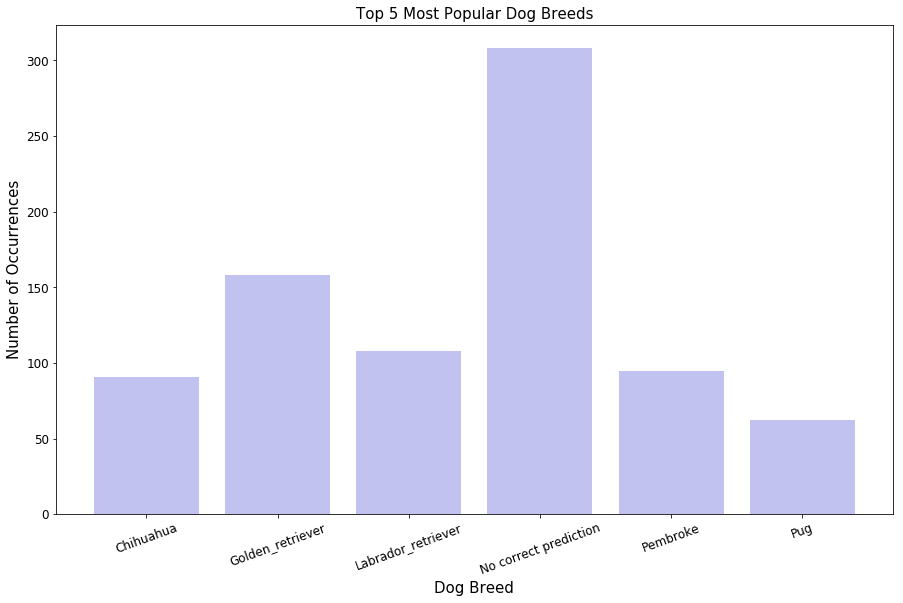

In [45]:
# Creating a bar chart of the top 5 most popular breeds
fig, ax = plt.subplots(figsize=(15,9))
ax.bar(top_5_breeds.index, top_5_breeds.values, color=['#c2c2f0', '#c2c2f0', '#c2c2f0', '#c2c2f0', '#c2c2f0'])

# Add labels and title to the chart
ax.set_xlabel('Dog Breed', size = 15)
ax.set_ylabel('Number of Occurrences', size = 15)
ax.set_title('Top 5 Most Popular Dog Breeds', size = 15)
plt.xticks(rotation= 20, size = 12)
plt.yticks(size = 12)

# Display the chart
plt.show()

### 2) Most common name?

#### Code

In [39]:
# Get the counts of each dog name
name_counts = twit_arc['name'].value_counts()

# Print the most common dog name
print("The 1st most common dog name is:", name_counts.index[0])
print("The 2nd most common dog name is:", name_counts.index[1])
print("The 3rd most common dog name is:", name_counts.index[2])
print("The 4th most common dog name is:", name_counts.index[3])
print("The 5th most common dog name is:", name_counts.index[4])

The 1st most common dog name is: None
The 2nd most common dog name is: Charlie
The 3rd most common dog name is: Lucy
The 4th most common dog name is: Oliver
The 5th most common dog name is: Cooper


In [73]:
name_counts

None        726
Lucy         11
Charlie      11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Lola          8
Winston       8
Sadie         8
Daisy         7
Toby          7
Stanley       6
Bailey        6
Koda          6
Bella         6
Oscar         6
Bo            6
Jax           6
Louis         5
Buddy         5
Scout         5
Dave          5
Chester       5
Milo          5
Bentley       5
Rusty         5
Leo           5
Cassie        4
Sophie        4
           ... 
Perry         1
Hanz          1
Molly         1
Mookie        1
Roscoe        1
Rueben        1
Logan         1
Brandy        1
Kingsley      1
Eleanor       1
Durg          1
Tayzie        1
Rufio         1
Amélie        1
Terrenth      1
Trigger       1
Ruffles       1
Kenny         1
Glacier       1
Mark          1
Tater         1
Andru         1
Craig         1
Obi           1
Taco          1
Reptar        1
Kody          1
Kevon         1
Chuq          1
Mo            1
Name: name, Length: 931,

### Insights

> - A very high number of 726 have no dog name. Possibly were not properly recorded. 
> - For female & male dogs: Lucy and Charlie are the most popular names.
> - After None, 11 names can be place on the top 5 most common names, since their qualification matches (no difference of number of name, or only 1 name difference)


### Visualization

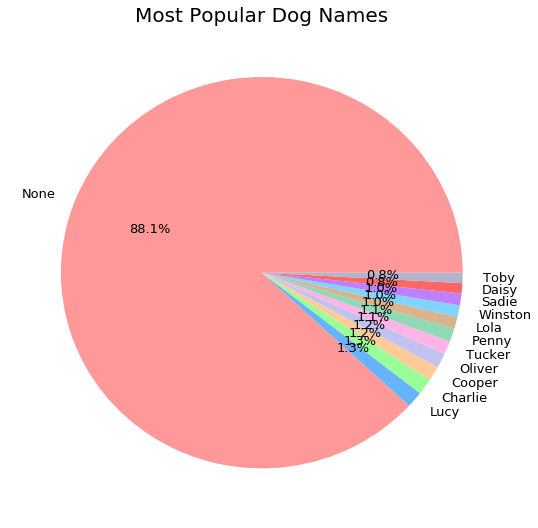

In [82]:
# Defining fun colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#8fd9b6', '#d9b38c', '#80d4ff', '#bf80ff', '#ff6666', '#b3b3cc']
#Plotting
popular_name = twit_arc.name.value_counts()[:12] 
plt.figure(figsize = (9,9))
plt.title("Most Popular Dog Names", size = 20)
plt.pie(popular_name, labels = popular_name.index, colors = colors, autopct='%1.1f%%', textprops={'fontsize': 13});


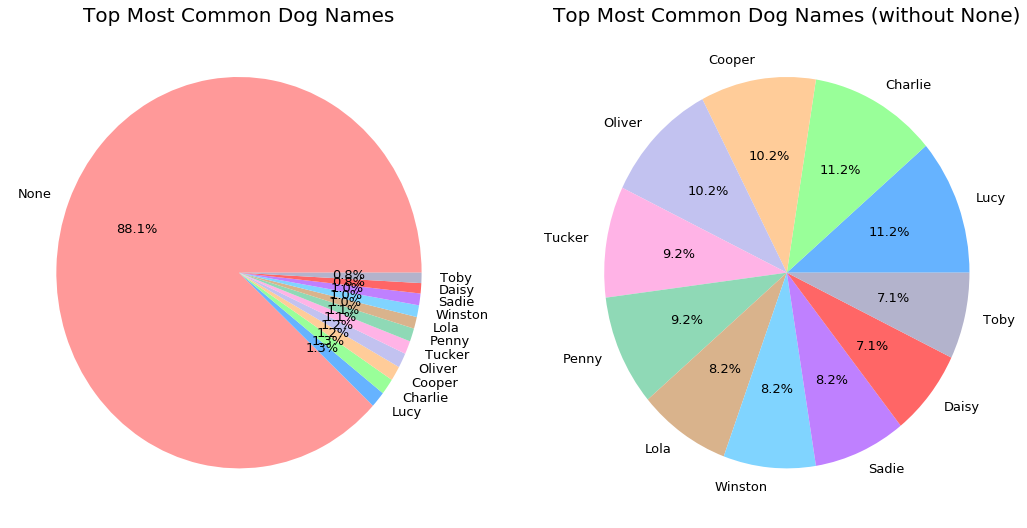

In [83]:
#checking with and without the None names:

# Extracting the top and top - first names (excluding the first most common name)
top_11_names = twit_arc['name'].value_counts().head(12)
top_10_names_excluding_first = twit_arc['name'].value_counts().iloc[1:12]

# Creating a 1x2 subplot for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# Plotting the first pie chart with the top 11 names
axes[0].pie(top_11_names, labels=top_11_names.index, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 13})
axes[0].set_title('Top Most Common Dog Names', size=20)

# Plotting the second pie chart with the top 10 names (excluding the first most common name)
axes[1].pie(top_10_names_excluding_first, labels=top_10_names_excluding_first.index, colors=colors[1:], autopct='%1.1f%%', textprops={'fontsize': 13})
axes[1].set_title('Top Most Common Dog Names (without None)', size=20)

# Display the pie charts
plt.show()

### 3) Most common rating?

#### Code

In [49]:
# Geting the counts of each rating
rating_counts = twit_arc['rating_numerator'].value_counts()

# Geting the 5 most common rating
most_common_rating = rating_counts.index[0:5]

# Printing the most common rating
print("The most common rating is:", most_common_rating)

The most common rating is: Int64Index([10, 12, 11, 13, 14], dtype='int64')


### Insights

> - The most popular rating is 10/10, 12/10, and 11/10. 
> - It was found that *WeRateDogs* tend to give high ratings to most of the dogs they post.

### Visualization

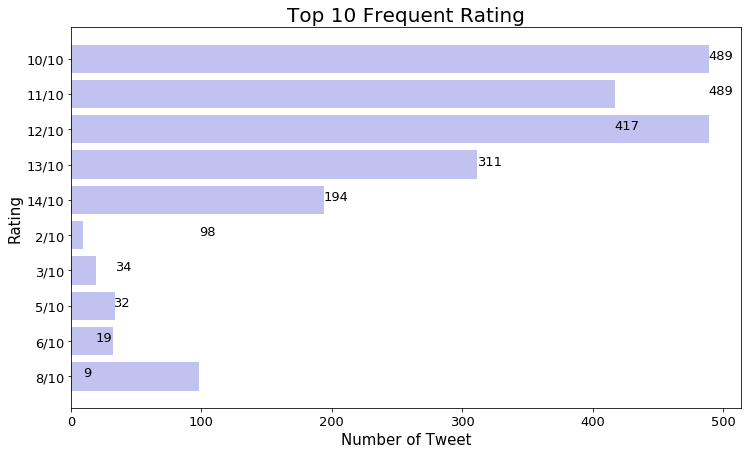

In [58]:
frequent_rating = twit_arc.ratings.value_counts()[:10]

plt.figure(figsize = (12,7))
plt.barh(y = frequent_rating.index, width= frequent_rating,  color=['#c2c2f0', '#c2c2f0', '#c2c2f0', '#c2c2f0', '#c2c2f0'])
plt.title("Top 10 Frequent Rating", size = 20)
plt.ylabel("Rating", size = 15)
plt.xlabel("Number of Tweet", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.gca().invert_yaxis()

for index, value in enumerate(frequent_rating):
    plt.text(value, index, str(value), size = 13)
    
plt.show()